In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# 1)

In [2]:
def convolve(f,g):
    return np.real( np.fft.ifft( np.fft.fft(f) * np.fft.fft(g) ) )
def convol_shift(y,shift):
    shifter = np.zeros(len(y));  shifter[shift] = 1
    return convolve(y,shifter)

<IPython.core.display.Javascript object>


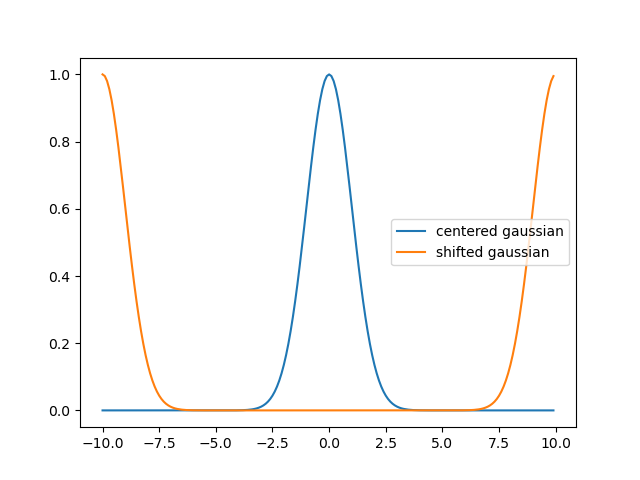

In [3]:
x = np.arange(-10,10,0.1)
shift = int(len(x)/2)
f = np.exp(-0.5*x**2)
f_shift = convol_shift(f,shift)

plt.figure()
plt.plot(x,f , label='centered gaussian')
plt.plot(x,f_shift , label='shifted gaussian')
plt.legend()

# 2)

In [4]:
def correl(f,g):
    return np.real( np.fft.fftshift( np.fft.ifft( np.fft.fft(f) * np.conj(np.fft.fft(g)) ) ) )

<IPython.core.display.Javascript object>


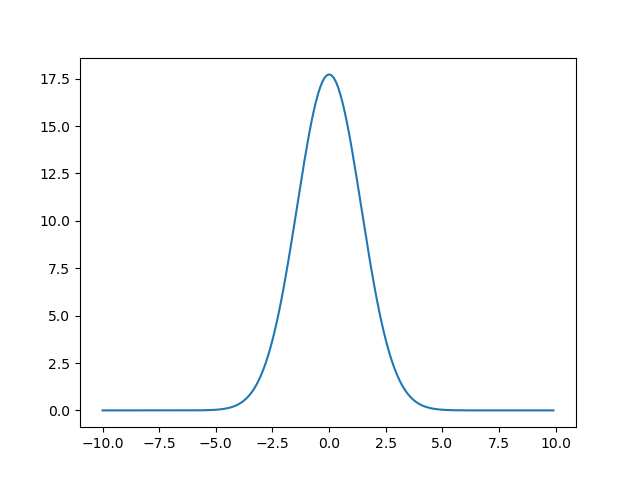

In [5]:
x = np.arange(-10,10,0.1)
f = np.exp(-0.5*x**2)
f_corr = correl(f,f)

plt.figure()
plt.plot(x,f_corr)

# 3)

<IPython.core.display.Javascript object>


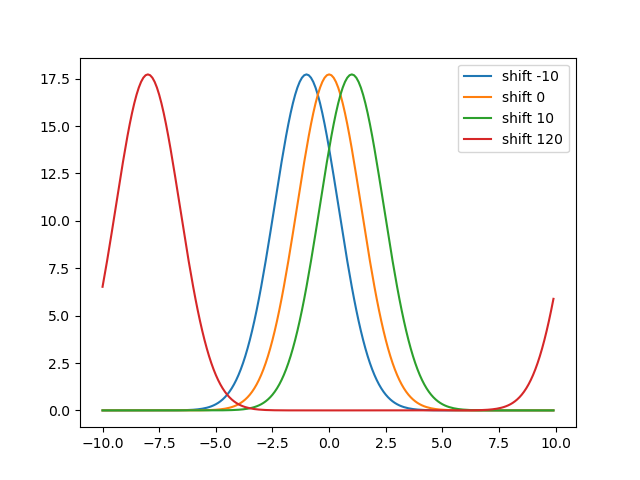

In [6]:
x = np.arange(-10,10,0.1)
f = np.exp(-0.5*x**2)
shifts = np.arange(-10,11,10)
shifts = np.append(shifts , int(3*len(x)/5))

f_shicorr = [None] * len(shifts)
plt.figure()
for i in range(len(shifts)):
    f_shift = convol_shift(f,shifts[i])
    f_shicorr[i] = correl(f_shift,f)
    plt.plot(x,f_shicorr[i] , label='shift '+str(shifts[i]))
plt.legend()

## Correlation plots seen are expected as we essentially introduce lag into our original gaussian. The correlation peak with respect to our original center at 0 corresponds to the shift in the original gaussian

# 4)

In [7]:
def zeropad_convolve(f,g):
    f = np.append(f,np.zeros(int(len(f)/4)))
    g = np.append(g,np.zeros(int(len(g)/4)))
    return convolve(f,g)

<IPython.core.display.Javascript object>


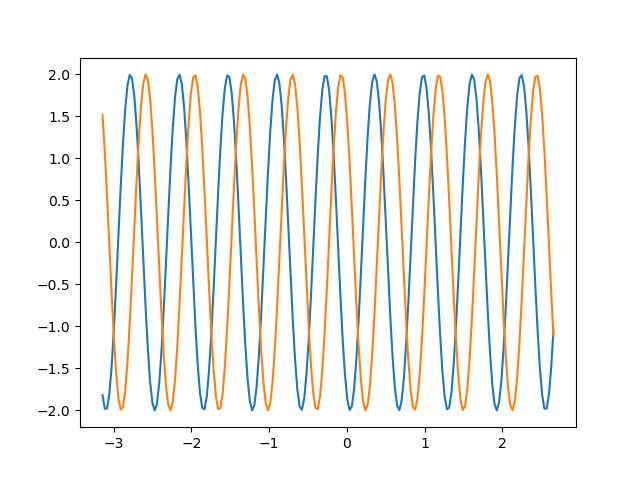

<IPython.core.display.Javascript object>


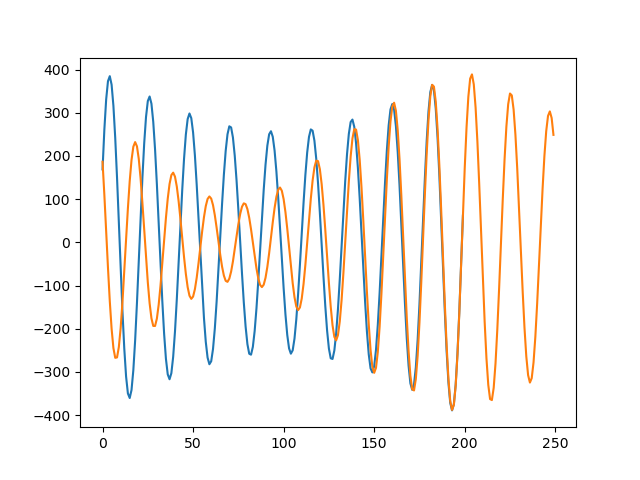

In [8]:
x = np.linspace(-np.pi,11*np.pi/13,200)
y1 = 2*np.sin(10.0*x + (-2))
y2 = 2*np.sin(10.0*x + (-4))
plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)

y_conv = convolve(y1,y2)
y_conv0 = zeropad_convolve(y1,y2)
plt.figure()
plt.plot(y_conv)
plt.plot(y_conv0)

# 5c)

In [9]:
def analytic_dft_sin(x,l):
    ft = np.empty(len(x))
    k = np.arange(len(x))
    for m in range(len(x)):
        ft[m] = (1/(2*np.complex(0,1))) * np.sum(  np.exp( 2*np.pi*np.complex(0,1)*x*(l-k[m])/len(x) ) - np.exp( -2*np.pi*np.complex(0,1)*x*(l+k[m])/len(x) )  )
    return ft

(200,)
[ 7.10542736e-15  1.77635684e-15  3.55271368e-15  7.10542736e-15
  1.77635684e-15  5.32907052e-15  1.77635684e-15  0.00000000e+00
  0.00000000e+00 -3.55271368e-15  1.77635684e-15  8.88178420e-15
  3.55271368e-15  0.00000000e+00  7.10542736e-15  0.00000000e+00
  3.55271368e-15  0.00000000e+00  0.00000000e+00 -3.55271368e-15
  1.77635684e-15 -1.77635684e-15  3.55271368e-15  3.55271368e-15
  8.88178420e-16  4.44089210e-15  3.55271368e-15  0.00000000e+00
  2.66453526e-15  5.32907052e-15  3.55271368e-15  1.77635684e-15
  1.77635684e-15  0.00000000e+00  1.77635684e-15  5.32907052e-15
 -1.77635684e-15  5.32907052e-15  0.00000000e+00 -1.77635684e-15
  0.00000000e+00  0.00000000e+00 -1.77635684e-15  0.00000000e+00
  0.00000000e+00 -5.32907052e-15 -7.10542736e-15 -3.55271368e-15
 -3.55271368e-15 -3.55271368e-15 -1.77635684e-15  3.55271368e-15
 -1.77635684e-15 -7.10542736e-15  7.10542736e-15  3.55271368e-15
 -3.55271368e-15 -7.10542736e-15  3.55271368e-15  7.10542736e-15
  0.00000000e+00 -

C:\Users\wilia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


<IPython.core.display.Javascript object>


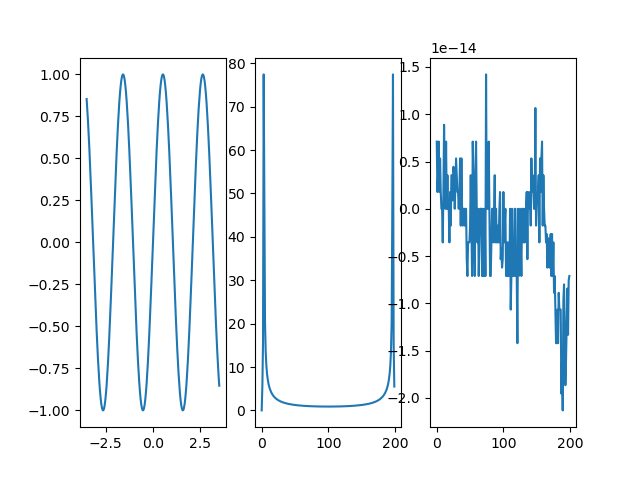

In [10]:
x = np.linspace(-3.5,3.5,200)
l = 95
y = np.sin(2*np.pi*l*x/len(x))
yft = np.fft.fft(y)
yft_an = analytic_dft_sin(x,l)
print(yft_an.shape)
print(yft_an)

plt.figure()
plt.subplot(1,3,1); plt.plot(x,y)
plt.subplot(1,3,2); plt.plot(np.abs(yft))
plt.subplot(1,3,3); plt.plot(yft_an)

## We observe leakage instead of a straight delta function.
## The analytical solution (rightmost plot) is less than ideal

# 5d)

In [11]:
def cos_window(n):
    return 0.5 - 0.5*np.cos(2*np.pi*np.arange(n)/n)

<IPython.core.display.Javascript object>


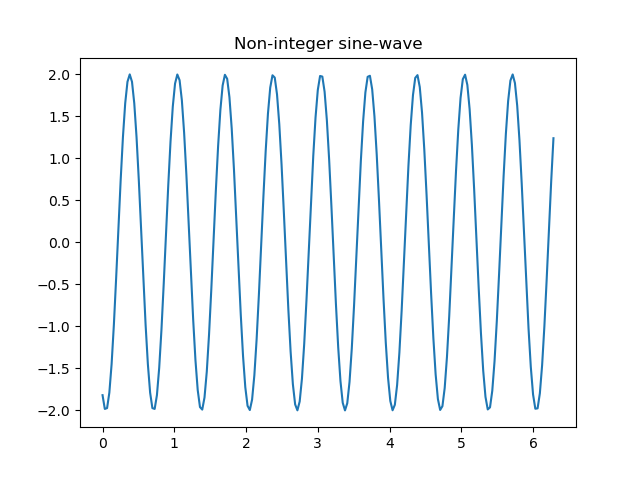

<IPython.core.display.Javascript object>


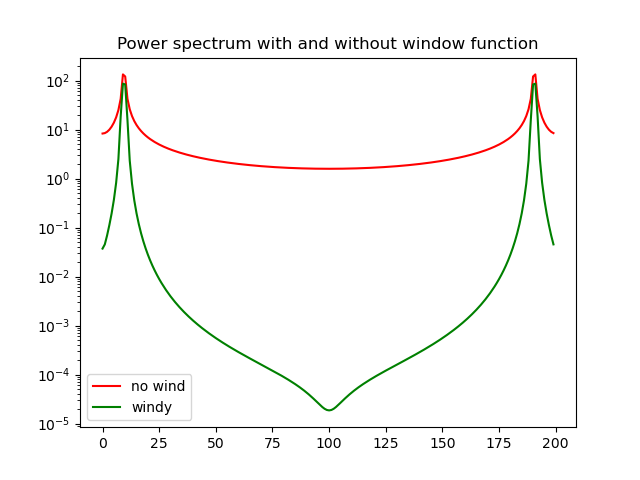

In [12]:
x = np.linspace(0,2*np.pi,200)
y = 2*np.sin(3*np.pi*x + (-2))
plt.figure(); plt.plot(x,y); plt.title('Non-integer sine-wave')
wind = cos_window(len(x))

y_ft = np.fft.fft(y)
windy_ft = np.fft.fft(wind*y)

plt.figure(); plt.title('Power spectrum with and without window function')
plt.plot(np.abs(y_ft) , c='r' , label='no wind')
plt.plot(np.abs(windy_ft) , c='g' , label='windy')
plt.yscale('log'); plt.legend()

# 5e)

<IPython.core.display.Javascript object>


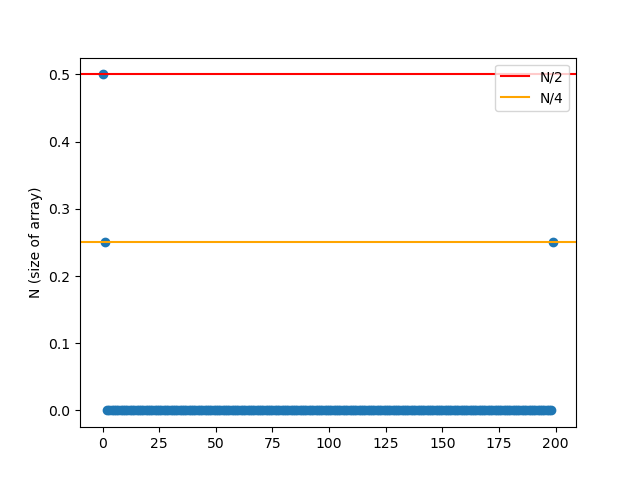

In [13]:
# Fourier transform of window function
wind_ft = np.fft.fft(cos_window(200))
plt.figure(); plt.scatter(np.arange(200),np.abs(wind_ft)/200)
plt.axhline(0.5 , c='red' , label='N/2'); plt.axhline(0.25 , c='orange' , label='N/4')
plt.ylabel('N (size of array)'); plt.legend()